*План на 2 апреля:*

    *посмотреть на данные аналогий, сравнить пересечения словарей*

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import EvaluateEmbeddingsLab as lab

In [3]:
def visualise_sim_dataset(data, size=(20, 20)):
    data_vocab, data_labels = data.get_all_words_and_labels()
    
    matr = np.zeros((len(data_vocab), len(data_vocab)))

    for pair in list(data.data.data_similarity.keys()):
        word1, word2 = pair[0], pair[1]
        # value = data.data.data_similarity[pair]
        word1_idx = data_vocab.index(word1)
        word2_idx = data_vocab.index(word2)

        matr[word1_idx, word2_idx] = 1
        matr[word2_idx, word1_idx] = 1 # value
        
    plt.figure(figsize=size)
    plt.imshow(matr, interpolation='none', cmap='gray')
    plt.show()

In [4]:
simlex = lab.GoldenStandartDataset("./SimLex-999-standartized.csv")
men = lab.GoldenStandartDataset("./MEN-standartized.csv")
wordsim = lab.GoldenStandartDataset("./WordSim-353-standartized.csv")

*В визуализации считаем матрицу симметричной, хотя в датасеты пары входят без симметрии.*

*Визуально MEN хорош, в нем больше всего концентрация пар.*
*Диагональ на визуализации обусловлена принципом построения матрицы - если оба слова в паре (a,b) не встретились до этого, то в список уникальных слов они попадут друг за другом [..., a, b, ...]. Т.е. это диагональ смещенная на 1.*

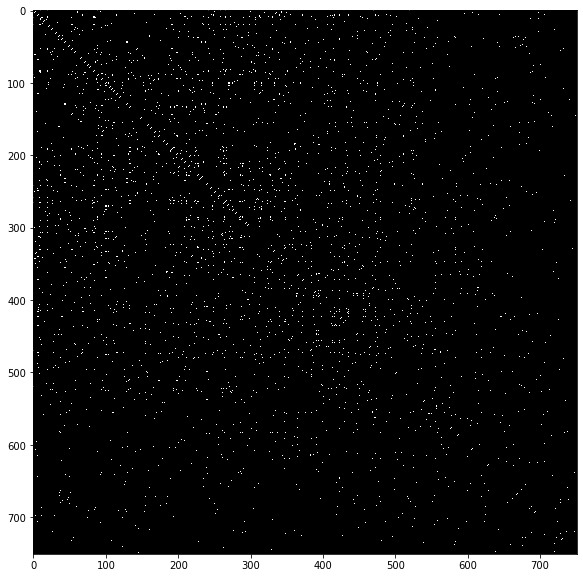

In [5]:
visualise_sim_dataset(men, size=(10, 10))

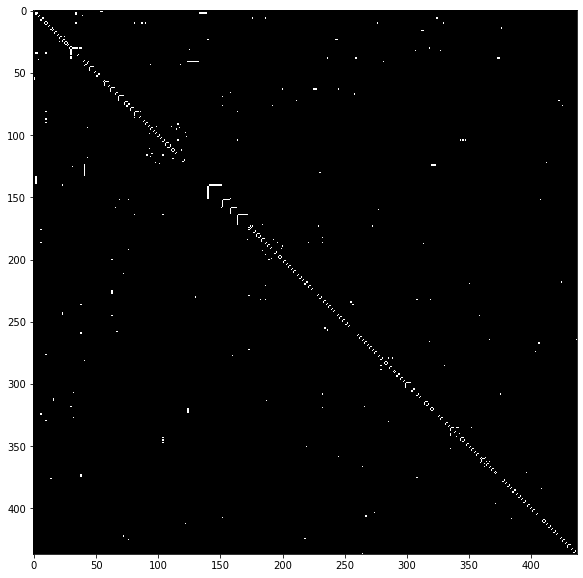

In [47]:
visualise_sim_dataset(wordsim, size=(10, 10))

*Тут у simlex хорошо видны три блока - в каждом блоке пары из слов одной части речи.*

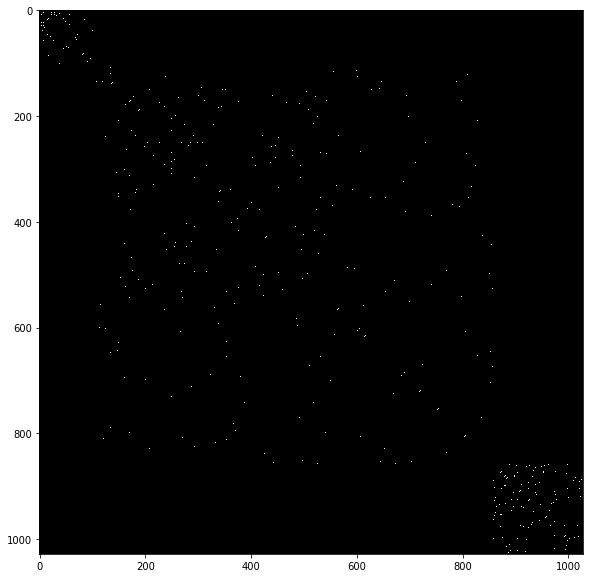

In [7]:
visualise_sim_dataset(simlex, size=(10, 10))

*Сравним словари.*

In [8]:
men_vocab, men_labels = men.get_all_words_and_labels()
wordsim_vocab, wordsim_labels = wordsim.get_all_words_and_labels()
simlex_vocab, simlex_labels = simlex.get_all_words_and_labels()

In [9]:
print("размеры словарей")
print("MEN", len(men_vocab))
print("WordSim", len(wordsim_vocab))
print("SimLex", len(simlex_vocab))

размеры словарей
MEN 751
WordSim 437
SimLex 1028


In [10]:
print("размеры датасетов")
print("MEN", len(men.data.data_similarity.keys()))
print("WordSim", len(wordsim.data.data_similarity.keys()))
print("SimLex", len(simlex.data.data_similarity.keys()))

размеры датасетов
MEN 3000
WordSim 351
SimLex 998


In [11]:
men_vocab_set = set(men_vocab)
wordsim_vocab_set = set(wordsim_vocab)
simlex_vocab_set = set(simlex_vocab)

In [12]:
print("пересечения словарей")
print("все три", len(set.intersection(men_vocab_set, wordsim_vocab_set, simlex_vocab_set)))
print("men & wordsim", len(set.intersection(men_vocab_set, wordsim_vocab_set)))
print("men & simlex", len(set.intersection(men_vocab_set, simlex_vocab_set)))
print("simlex & wordsim", len(set.intersection(simlex_vocab_set, wordsim_vocab_set)))

пересечения словарей
все три 52
men & wordsim 98
men & simlex 227
simlex & wordsim 124


*Неплохие пересечения относительно размеров словарей.*

*Сравним шкалы:*

In [17]:
print("минимальные и максимальные значения датасетов")
print("MEN", min(list(men.data.data_similarity.values())), max(list(men.data.data_similarity.values())))
print("WordSim", min(list(wordsim.data.data_similarity.values())), max(list(wordsim.data.data_similarity.values())))
print("SimLex", min(list(simlex.data.data_similarity.values())), max(list(simlex.data.data_similarity.values())))

минимальные и максимальные значения датасетов
MEN 0.0 50.0
WordSim 0.23 10.0
SimLex 0.23 9.8


*Посмотрим, на каких парах минимальные значения*

In [23]:
def find_min_pair(data):
    for pair in data.data.data_similarity.keys():
        min_val = min(list(data.data.data_similarity.values()))
        if data.data.data_similarity[pair] == min_val:
            print(pair.to_string())

In [24]:
find_min_pair(wordsim)

king,cabbage


In [25]:
find_min_pair(simlex)

new,ancient
shrink,grow


In [26]:
find_min_pair(men)

bakery,zebra


*Приведем к одной шкале и попробуем посмотреть на объединения датасетов (wordsim и men объединять законно - там relatedness, у simlex - similarity, но тут спорно, создатели men считают similarity частным случаем relatedness, так что можем оставить такое допущение)*

In [29]:
for pair in men.data.data_similarity.keys():
    men.data.data_similarity[pair] /= 5

*Важно: выбрать один или несколько способов преобразования сходств в различия.*

In [34]:
common_vocab_set = set.union(men_vocab_set, wordsim_vocab_set, simlex_vocab_set)
common_vocab = list(common_vocab_set)

In [35]:
len(common_vocab)

1819

In [40]:
def visualise_sim_data_list(data_list, data_vocab, size=(20, 20)):
    matr = np.zeros((len(data_vocab), len(data_vocab)))
    
    for data in data_list:
    
        #data_vocab, data_labels = data.get_all_words_and_labels() 

        for pair in list(data.data.data_similarity.keys()):
            word1, word2 = pair[0], pair[1]
            # value = data.data.data_similarity[pair]
            word1_idx = data_vocab.index(word1)
            word2_idx = data_vocab.index(word2)

            matr[word1_idx, word2_idx] = 1
            matr[word2_idx, word1_idx] = 1 # value
        
    plt.figure(figsize=size)
    plt.imshow(matr, interpolation='none', cmap='gray')
    plt.show()

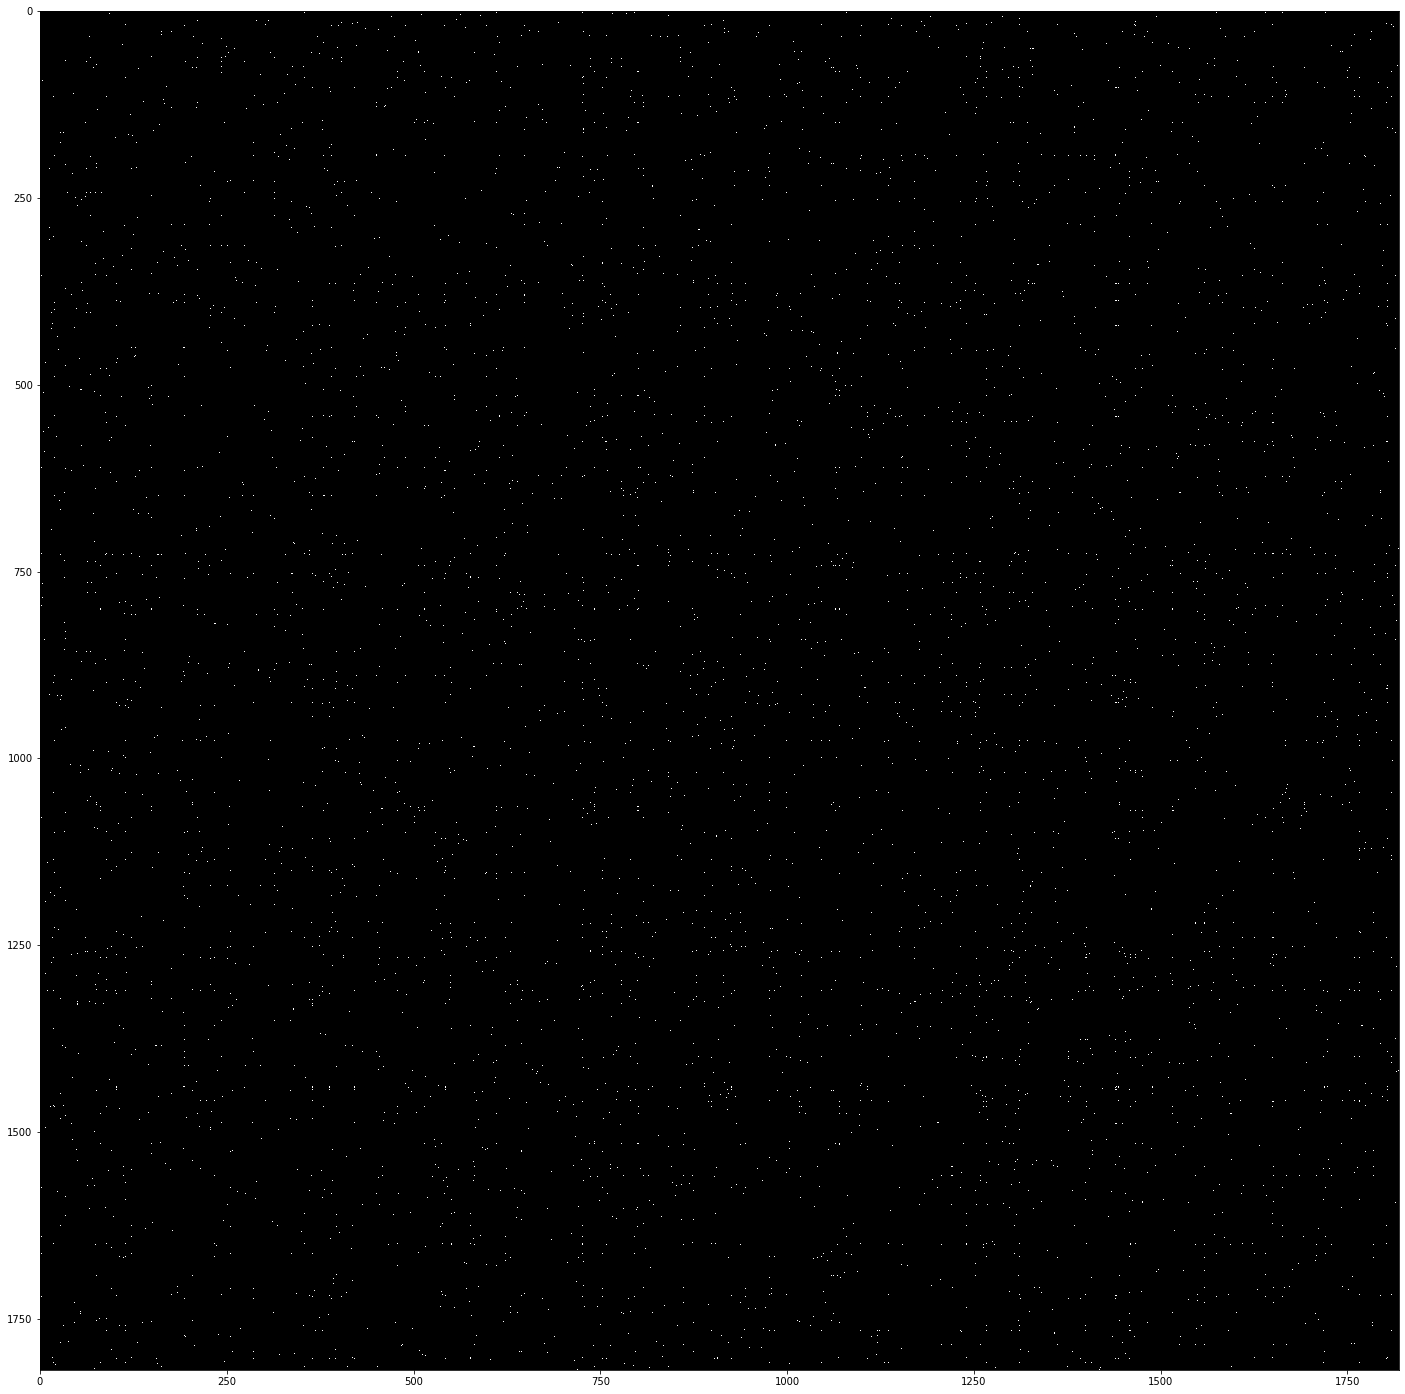

In [44]:
visualise_sim_data_list([simlex, men, wordsim], common_vocab, size=(25, 25))

*Теперь посмотрим на аналогии.*

In [61]:
prefix = "./BATS_3.0/"
directory = "3_Encyclopedic_semantics"

In [80]:
directories = sorted(os.listdir(prefix))
directories[1:-1]

['1_Inflectional_morphology',
 '2_Derivational_morphology',
 '3_Encyclopedic_semantics',
 '4_Lexicographic_semantics']

In [62]:
files = sorted(os.listdir(prefix + directory))
files

['E01 [country - capital].txt',
 'E02 [country - language].txt',
 'E03 [UK_city - county].txt',
 'E04 [name - nationality].txt',
 'E05 [name - occupation].txt',
 'E06 [animal - young].txt',
 'E07 [animal - sound].txt',
 'E08 [animal - shelter].txt',
 'E09 [things - color].txt',
 'E10 [male - female].txt']

In [83]:
def create_analogy(filepath):
    vocab = []
    output = []
    with open(filepath, newline='\n') as file:
        for string in file:
            pairlike = string[:-1]
            word, shifted_words = pairlike.split()
            shifted_words = shifted_words.split('/')
            output.append([word, shifted_words])
            vocab.append(word)
            for word in shifted_words:
                vocab.append(word)
    return output, vocab

In [95]:
def compare_vocabs(vocab):
    print("men", len(set.intersection(men_vocab_set, vocab)))
    print("simlex", len(set.intersection(vocab, simlex_vocab_set)))
    print("wordsim", len(set.intersection(vocab, wordsim_vocab_set)))
    print("common", len(set.intersection(vocab, common_vocab_set)))

In [112]:
global_vocab = []
global_both_counter = 0

for directory in directories[3:-1]:
    print(directory)
    for file in sorted(os.listdir(prefix + directory)):
        print('')
        print(file[5:-5])
        analogy, vocab = create_analogy(prefix + directory + "/" + file)
        global_vocab += vocab
        
        words_counter = 0
        both_counter = 0
        for pairlike in analogy:
            word = pairlike[0]
            words = pairlike[1]
            left_flag = False
            right_flag = False
            if word in common_vocab:
                words_counter += 1
                left_flag = True
            for word in words:
                if word in common_vocab:
                    words_counter += 1
                    right_flag = True
            if left_flag and right_flag:
                both_counter += 1
        print("Пар, из которых можно составлять аналогии, целиком из слов общего словаря", both_counter)
        global_both_counter += both_counter
        compare_vocabs(set(vocab))
        print('')
        
print("Всего пар (из которых потом составляются четверки), которые состоят из слов общего словаря", global_both_counter)

3_Encyclopedic_semantics

country - capital
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 0
men 0
simlex 1
wordsim 0
common 1


country - language
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 0
men 0
simlex 0
wordsim 0
common 0


UK_city - county
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 0
men 2
simlex 1
wordsim 0
common 2


name - nationality
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 0
men 0
simlex 0
wordsim 0
common 0


name - occupation
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 0
men 1
simlex 9
wordsim 5
common 13


animal - young
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 15
men 33
simlex 18
wordsim 4
common 39


animal - sound
Пар, из которых можно составлять аналогии, целиком из слов общего словаря 3
men 27
simlex 14
wordsim 2
common 33


animal - shelter
Пар, из которых можно составлять аналогии, ц

In [105]:
compare_vocabs(set(global_vocab))

men 369
simlex 391
wordsim 141
common 657


In [106]:
len(common_vocab)

1819

*С объединенным датасетом больше трети слов пересекается со словарем датасета аналогий.*

*Вопрос в том, что нам нужно, чтобы хотя бы два слова из разных пар в аналогии были в близостях. Тогда мы достраиваем дополнительные слова. Если есть все четыре слова, то корректируем.*

*Как выяснилось, ~285 пар состоят только из слов общего словаря, то есть потенциально корректируют уже имеющиеся представления без добавления новых слов. Можно работать*

*План на 3 апреля:*
    
    *Строгая постановка задачи и введение ВКР*
    
    *Сравнить полносвязный слой с основными методами MDS*